# Animation of the inverse transform method

This is just a fun post which makes an animation of how the [inverse transform method](https://en.wikipedia.org/wiki/Inverse_transform_sampling) works.  This is a method for efficiently sampling from a univariate distribution given its quantile function.  The quantile function is the inverse cumulative distribution function.

Let $f$ be the density function, $F$ be the cumulative density function, and $F^{-1}$ be the quantile function.  For some univariate probability distribution $\mathcal{D}$.

In [1]:
import pylab as pl, scipy.stats as st
from arsenal.maths.rvs import show_distr

Below, we have a simple example distribution of a [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution).

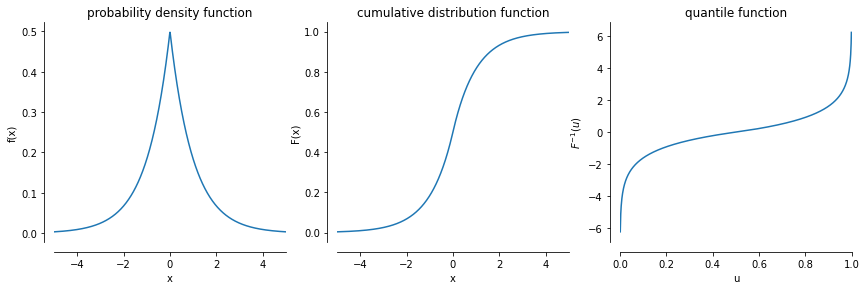

In [2]:
D = st.laplace(0)
a,b = -5, 5
show_distr(D, a, b);

In [3]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

T = 100
fig, ax = pl.subplots(figsize=(10,8), nrows=2, sharex=True)

xs = np.linspace(a, b, 1000)
u = np.random.uniform(0,1,size=T)

def animate(t):
    ax[1].clear(); ax[0].clear()
    x = D.ppf(u[:t+1])
    # histogram-pdf plot
    ax[0].plot(xs, D.pdf(xs), c='k')
    ax[0].hist(x, bins=25, density=True, alpha=0.5, range=(a,b))
    ax[0].axvline(x[t], zorder=100, c='r')    
    ax[0].set_ylim(0,1); ax[0].set_xlim(a,b)
    # cdf-ppf plot
    ax[1].axhline(u[t])
    ax[1].axvline(x[t], zorder=100, c='r')
    ax[1].plot(xs, D.cdf(xs), c='k', lw=2)    
    ax[1].set_ylim(0,1); ax[1].set_xlim(a,b)
    for i, aa in enumerate(ax):
        if i == 1:
            aa.set_xticks(x)
            aa.set_yticks(u[:t+1])
            aa.set_yticklabels([])            
            aa.set_xticklabels([])            
        else:
            aa.spines['left'].set_visible(False)        
            aa.set_xticks(x)
            aa.set_yticks([])
        aa.spines['right'].set_visible(False)
        aa.spines['top'].set_visible(False)
        aa.yaxis.set_ticks_position('left')
    fig.tight_layout()
    return []

anim = FuncAnimation(fig, animate, frames=T, interval=20, blit=True)
pl.close(anim._fig)
HTML(anim.to_jshtml())

**How to read the plot:**  The bottom plot's y-axis ranges from $0$ to $1$.  The first step of the algorithm is to sample $u \sim U(0,1)$, which we used to probe along the y-axis.  The quantile function gives us fast access to the position along the x-axis for $u$.  The point $x = F^{-1}(u)$ is a sample from the target distribution $\mathcal{D}$.  The top plot shows empirical distribution of samples converging to $\mathcal{D}$. This is illustrated as a histogram superimposed on the probability density function $f(x)$.